<h1 style="text-align: center;">Pytorch Basics: Autograd</h1>

## 1. Introduction  
This notebook is a part of a part of my journey to learn Pytorch and deep learning. It serves as a reference for me and others who are interested in learning Pytorch. In this notebook, I will cover important concept in Pytorch: Autograd that are, to my experience, the core of Pytorch. Along with the concepts, I will also provide some examples to illustrate how to use them.


In [1]:
import numpy as np
import torch
import math
import matplotlib.pyplot as plt
plt.style.use( 'seaborn-v0_8-whitegrid') # set the style for the plot, this optional
from torchviz import make_dot # for visualizing the computational graph
from IPython.display import Image # for displaying the image
import time

# start timer
start = time.time()

## 2. Fundamental of Autograd

### 2.1 What is Gradient Descent?
Before diving into Autograd, let's talk about machine learning training process. In context of machine learning, an initial model will take inputs and produce outputs. Then, the outputs are compared with the ground truth to see how well the model performs. The difference between the model's outputs and ground truth is called loss. Depending on nature of the outputs, different methods will be use to calculate the loss. For example: if the output is continuous, Mean Square Error or Mean Absolute Error can be used. If the output is categorical, cross entropy can be use *(I reserve topic about the loss in seperate Notebook)*.

The goal of machine learning is to minimise the loss. To achive this purpose, the model should change/update their weights (Coefficients in traditional modeling language) in way that will decrease the loss. To guide the change, the model should know direction of change. The direction of change is determined by the gradient of the loss function. The gradient of the loss function is calculated by taking the derivative of the loss function with respect to the weights. The gradient is a vector that points to the direction of the steepest increase of the loss function. To decrease the loss, the model should move in the opposite direction of the gradient. It is called **Gradient Descent**. Now, we know the direction to change the weights, but we also need to know how much to change the weights. This quantity is called learning rate. The update rule is as follows:

$$
\begin{align}
\theta_{new} = \theta_{old} - \alpha \nabla L
\end{align}
$$
- $\theta_{new}$: new weights after the update
- $\theta_{old}$: current weights before the update
- $\alpha$: learning rate, a small scalar value that controls the step size of the update
- $\nabla L$: gradient of the loss function with respect to the weights, indicating the direction and rate of the steepest increase in loss


### 2.2 What is Autograd?
Mathematically, the gradient of a function is the vector of partial derivatives of the function with respect to its parameters. There are two words that often confuse people *(like me)*: gradient and derivative. In short, gradient is a vector of partial derivatives. It is used for functions of multiple varibales. Derivative is a scalar value that indicates that rate of change of a function with respect to one variable. Following is examples to illustrate the difference between gradient and derivative:
- Derivative: $\frac{d}{dx} f(x) = f'(x)$
    - For function $f(x) = x^2$, the derivative is $f'(x) = 2x$; if x = 2, then $f'(2) = 4$
    - The value of $f'(2) = $ is a scalar value and is translated as the rate of change of the function $f(x) = x^2$ at x = 2 is 4. It means increase in x leads to increase in f(x) by 4 times. Then if we want do decrease f(x), we should decrease x.
- Gradient: if we have function $f(x_{1}, x_{2}, x_{3})$
    - Gradient is writen as: $\nabla f = (\frac{\nabla{f}}{\nabla{x_{1}}}, \frac{\nabla{f}}{\nabla{x_{2}}}, \frac{\nabla{f}}{\nabla{x_{3}}})$.
    - For example: if $f(x_{1}, x_{2}, x_{3}) = x_{1}^2 + x_{2}^2 + x_{3}^2$, then $\nabla f = (2x_{1}, 2x_{2}, 2x_{3})$ If $x_1 = 1; x_2 = 2; x_3 = 3$, then $\nabla f = (2, 4, 6)$. the $f' = 2^2 + 4^2 + 6^2 = 56$.
    - The gradient result can be interpreted as if we increase $x_1$ by 1, $x_2$ by 2, and $x_3$ by 3, the function $f(x_{1}, x_{2}, x_{3})$ will increase by 56.

The mathematical details of gradient and derivative are not focus of this notebook. Practically, we need to know that gradient points in the direction where the function increase fastest. For multiple variables function it is called gradient. For single varibale function, it is called derivative. The scope of this notebook is to show how to calculate gradient and update parameter using Autograd in Pytorch.

### 2.3 How to use Autograd in Pytorch
Let's start with a simple function $y = \sin(x) $. So we start with creating a tenssor x and calculate y. Then we calculate the gradient of y with respect to x. Codes implementation is presented in following code cell.

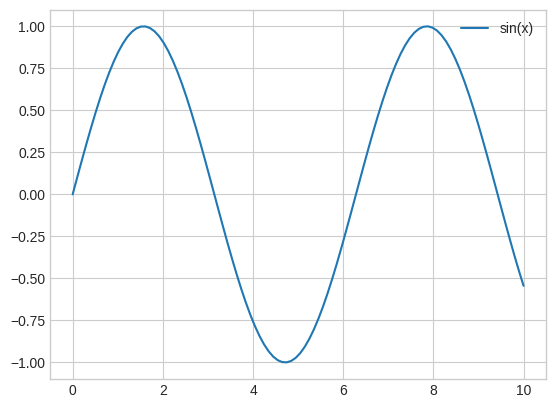

In [2]:
# create a tensor with random values
x_tensor = torch.linspace(0, 10, 100, requires_grad=True)
y_tensor = torch.sin(x_tensor)

# convert tensor to numpy
fig, ax = plt.subplots()
ax.plot(x_tensor.detach(), y_tensor.detach(), label='sin(x)')
ax.legend()
plt.show()

There is two special notes to be aware of:
- When I create x_tensor, I set requires_grad = True. This option tells Pytorch to track the gradient of x_tensor and any computation that involves x_tensor. The x_tensor is called leaf tensor. The gradient of leaf tensor is calculated by calling backward() method on output tensor. The gradient is stored in the grad attribute of the leaf tensor. No gradient is stored in the intermediate tensor. Let's explore x_tensor 

In [3]:
# explorer x_tensor
print(f"This is x_tensor: {x_tensor}")
print(f'along with each element of x_tensor ther is an requires_grad attribute=True: indicate that this tensor will be used to compute gradient')
print(f'the x_tensor has shape: {x_tensor.shape} and data type: {x_tensor.dtype} and stored in device: {x_tensor.device}')
print(f"This is grad_fn, a backward function of how to get: {x_tensor.grad_fn}")
print(f"This is accumulation grad associate with leaf tensor x_tensor: {x_tensor.grad}")

This is x_tensor: tensor([ 0.0000,  0.1010,  0.2020,  0.3030,  0.4040,  0.5051,  0.6061,  0.7071,
         0.8081,  0.9091,  1.0101,  1.1111,  1.2121,  1.3131,  1.4141,  1.5152,
         1.6162,  1.7172,  1.8182,  1.9192,  2.0202,  2.1212,  2.2222,  2.3232,
         2.4242,  2.5253,  2.6263,  2.7273,  2.8283,  2.9293,  3.0303,  3.1313,
         3.2323,  3.3333,  3.4343,  3.5354,  3.6364,  3.7374,  3.8384,  3.9394,
         4.0404,  4.1414,  4.2424,  4.3434,  4.4444,  4.5455,  4.6465,  4.7475,
         4.8485,  4.9495,  5.0505,  5.1515,  5.2525,  5.3535,  5.4545,  5.5556,
         5.6566,  5.7576,  5.8586,  5.9596,  6.0606,  6.1616,  6.2626,  6.3636,
         6.4646,  6.5657,  6.6667,  6.7677,  6.8687,  6.9697,  7.0707,  7.1717,
         7.2727,  7.3737,  7.4747,  7.5758,  7.6768,  7.7778,  7.8788,  7.9798,
         8.0808,  8.1818,  8.2828,  8.3838,  8.4848,  8.5859,  8.6869,  8.7879,
         8.8889,  8.9899,  9.0909,  9.1919,  9.2929,  9.3939,  9.4949,  9.5960,
         9.6970,  9.79

In [4]:
# do same with y_tensor
print(f"This is y_tensor: {y_tensor}")
print(f'along with each element of y_tensor ther is an requires_grad attribute=True: indicate that this tensor will be used to compute gradient')
print(f'the y_tensor has shape: {y_tensor.shape} and data type: {y_tensor.dtype} and stored in device: {y_tensor.device}')
print(f"This is grad_fn, a backward function of how to get: {y_tensor.grad_fn}")
print(f"This is accumulation grad associate with y_tensor: {y_tensor.grad}")

This is y_tensor: tensor([ 0.0000,  0.1008,  0.2006,  0.2984,  0.3931,  0.4839,  0.5696,  0.6496,
         0.7230,  0.7889,  0.8469,  0.8962,  0.9364,  0.9670,  0.9878,  0.9985,
         0.9990,  0.9893,  0.9696,  0.9399,  0.9007,  0.8523,  0.7952,  0.7300,
         0.6574,  0.5781,  0.4928,  0.4026,  0.3082,  0.2107,  0.1111,  0.0103,
        -0.0906, -0.1906, -0.2886, -0.3837, -0.4748, -0.5612, -0.6418, -0.7158,
        -0.7826, -0.8414, -0.8916, -0.9327, -0.9643, -0.9861, -0.9978, -0.9994,
        -0.9908, -0.9720, -0.9434, -0.9051, -0.8576, -0.8014, -0.7370, -0.6651,
        -0.5864, -0.5017, -0.4120, -0.3180, -0.2207, -0.1213, -0.0206,  0.0804,
         0.1805,  0.2787,  0.3742,  0.4658,  0.5526,  0.6338,  0.7086,  0.7761,
         0.8358,  0.8869,  0.9289,  0.9615,  0.9843,  0.9971,  0.9997,  0.9921,
         0.9744,  0.9467,  0.9094,  0.8629,  0.8075,  0.7439,  0.6727,  0.5947,
         0.5106,  0.4213,  0.3277,  0.2308,  0.1315,  0.0308, -0.0701, -0.1703,
        -0.2688, -0.36

/tmp/ipykernel_3919/3539422933.py:6: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print(f"This is accumulation grad associate with y_tensor: {y_tensor.grad}")


For the y_tensor, we have a slightly different stituation. First, there is no required_grad = True. This means that Pytorch does not track gradient of y_tensor. If we try to access gradient of y_tensor, it returns None and raise usewarning that gradient is nto available for non-leaf tensor. if we want to calculate gradient of y_tensor uses retain_grad() method on non-leaf tensor.

Secondly, y_tensor have grad_fn = <SinBackward0 object at 0x7f1badfac790> associate with it. It saying that the y_tensor is created by using sin function.
Let's visualise this concept in the following code cell.

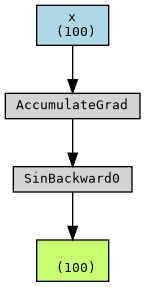

In [5]:
import os

# Create the directory if it doesn't exist
os.makedirs("plots", exist_ok=True)

# Render the computational graph and display the image
make_dot(y_tensor, params=dict(x=x_tensor)).render("plots/sinx_tensor", format="png")
Image("plots/sinx_tensor.png")

The graph telling to us that y_tensor is created by applying sin function on x_tensor. The x_tensor gradient is accumulated; both x_tensor and y_tensor have same shape of 100  *(we create a linear space with 100 values taking from 0 to 10)*.

Let's make the current computation a little bit more complex by adding additional computation.

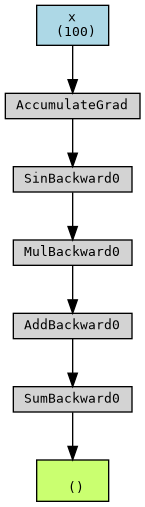

In [6]:
z = 2*y_tensor + 1
g = z.sum()
make_dot(g, params=dict(x=x_tensor)).render("plots/sum_z", format="png")
Image("plots/sum_z.png")

In [7]:
# calculate the gradient and check the grad attribute of x_tensor
g.backward()
print(f'This is the gradient of x_tensor:\n {x_tensor.grad}')

This is the gradient of x_tensor:
 tensor([ 2.0000,  1.9898,  1.9593,  1.9089,  1.8390,  1.7503,  1.6438,  1.5205,
         1.3818,  1.2289,  1.0636,  0.8873,  0.7021,  0.5096,  0.3120,  0.1112,
        -0.0907, -0.2917, -0.4897, -0.6828, -0.8689, -1.0461, -1.2126, -1.3668,
        -1.5071, -1.6320, -1.7403, -1.8308, -1.9026, -1.9551, -1.9876, -1.9999,
        -1.9918, -1.9633, -1.9149, -1.8469, -1.7602, -1.6554, -1.5338, -1.3966,
        -1.2451, -1.0809, -0.9057, -0.7213, -0.5295, -0.3323, -0.1318,  0.0702,
         0.2714,  0.4698,  0.6634,  0.8503,  1.0285,  1.1962,  1.3518,  1.4935,
         1.6200,  1.7300,  1.8224,  1.8962,  1.9507,  1.9852,  1.9996,  1.9935,
         1.9672,  1.9207,  1.8547,  1.7698,  1.6669,  1.5469,  1.4112,  1.2611,
         1.0981,  0.9240,  0.7404,  0.5493,  0.3526,  0.1523, -0.0496, -0.2510,
        -0.4498, -0.6440, -0.8316, -1.0108, -1.1797, -1.3365, -1.4798, -1.6079,
        -1.7196, -1.8138, -1.8896, -1.9460, -1.9826, -1.9990, -1.9951, -1.9708,
     

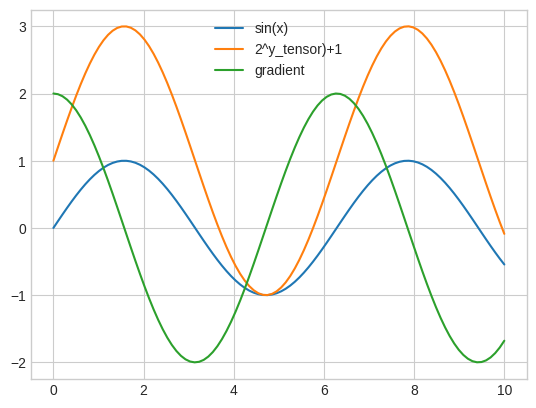

In [8]:
fig, ax = plt.subplots()
ax.plot(x_tensor.detach(), y_tensor.detach(), label='sin(x)')
ax.plot(x_tensor.detach(), z.detach(), label='2^y_tensor)+1')
ax.plot(x_tensor.detach(), x_tensor.grad.detach(), label='gradient')
ax.legend()
plt.show()

Now gradient of g function with respect to x_tensor have been added to x_tensor. There are two special notes to be aware of:
- If we try to call backward() second time on g function, it will raise an error as below code cell. The reason is that after the first backward() call, the computational graph is not retained to free memory. If we want to call backward() multiple times, we should set retain_graph = True in the first backward() call. a curious reader now can wondering that during training process, backward() is called multiple times but it raises no error. The reason is that each time backward() is called followed by update step, computational is freed. The next epoch, the computational graph is recreated and the process is repeated.

In [9]:
g.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

Before we move to the second note, let's have a look at two computational graphs of g and z function. As we can see that x_tensor and g function have different shape as g is a scalar value. while x_tensor is a 1D tensor. but z function have same shape with x_tensor, a 1D vector of 100 elements. We can see more clearly in the following codes and graph.

In [ ]:
print(f'This is shape of x_tensor: {x_tensor.shape}')
print(f'This is shape of sum_z: {g.shape}')
print(f'THis is shape of z: {z.shape}')

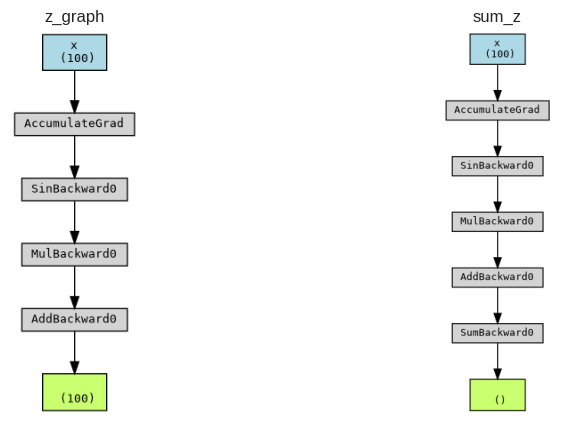

In [10]:
z_graph = make_dot(z, params=dict(x=x_tensor)).render("plots/z_graph", format="png")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(plt.imread("plots/z_graph.png"))
axes[0].set_title("z_graph")
axes[1].set_title("sum_z")
axes[1].imshow(plt.imread("plots/sum_z.png"))
axes[0].axis('off')
axes[1].axis('off')
axes[0].grid(False)
axes[1].grid(False)
plt.show()

Previously, we have successfully calculate the gradient of sum_z using backward() method. Expectedly, with similar logic we can calculate gradient of z function with similar logic. The code implementation is presented in the following code cell.

In [11]:
x_tensor.grad.zero_()
z.backward()
print(f'This is the gradient of z function with respect to x_tensor:\n {x_tensor.grad}')

RuntimeError: grad can be implicitly created only for scalar outputs

Instead of return expected output, it raises error. The reason is that z is not a scalar value as sum_z. When the output is non-scalar, backward() function require a gradient argument/vector that has same shape and type with leaf tensor. This is used to calculate the Jacobian-vector product. This stituation happen when we have multiple outputs. Pytorch need this information to reduce the vector output to a scalar value. If we specify gradient as vector of 1s, it mean that each output contributes equally to final scalar values. Or we can specify different values to indicate the importance of each output. This notebook will set a vector of 1s as demonstation. Curious reader could try different value. The code implementation is presented in the following code cell: 

In [12]:
x_tensor.grad.zero_() # reset the gradient to zero
x_squared = x_tensor**2
print(f'This is the gradient of x_square function with respect to x_tensor:\n {x_tensor.grad}')
x_squared.backward(torch.ones_like(x_tensor))

This is the gradient of x_square function with respect to x_tensor:
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])


## 3. Conclusion
This notebook has briefly introduced two important concepts and its implemenation in Pytorch, tensor and qutograd. The tensor is an object that store collection of numbers that represent features of intersted objects or events. The autograd is a Pytorch module that automatically calculate the gradient of a function with respect to its parameters./.